In [1]:
from IPython import get_ipython
from IPython.core.display import display, HTML
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()
import seaborn as sns
import pysam
from scipy.stats import pearsonr, spearmanr
from glob import glob
import pylab
import matplotlib.pyplot as plt
import terra_pandas


display(HTML("<style>#notebook-container { width:100% ;}</style>"))
display(HTML("<style>#menubar-container { width:100% !important;}</style>"))

ipython = get_ipython()
ipython.magic("config InlineBackend.print_figure_kwargs={'facecolor' : 'w'}")
ipython.magic("pylab inline")

params = {'legend.fontsize': '40',
          'figure.figsize': (10, 10),
          'axes.labelsize': '40',
          'axes.titlesize': '50',
          'xtick.labelsize': '40',
          'ytick.labelsize': '40',
          'axes.linewidth': '0.5',
          'pdf.fonttype': '42',
          'font.sans-serif': 'Helvetica'}
pylab.rcParams.update(params)

preferred_styles = ['seaborn-v0_8-white', 'seaborn-white']
for style in preferred_styles:
    if style in plt.style.available:
        plt.style.use(style)
        break
# from https://github.com/thouis/terra-startup/blob/main/terra_init/__init__.py

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# new categories "H3K27me3 element", "CTCF element", "High H3K27ac", "H3K27ac", "No H3K27ac"

# new candidate elements with NEW LABELS and including promoters


In [4]:
eqtls = pd.read_table('data/eQTL_catalogue_v7.processed.PIP0.tsv.gz')
candidate_elements = pd.read_table('data/candidate_elements_with_promoters.GM12878_WTC11.tsv.gz')

In [5]:
candidate_elements

,cell_type,chr,start,end,class,elementName,activity_base,activity_base_no_qnorm,DHS.RPMpromoter.quantile,DHS.RPMnonpromoter.quantile,...,CTCF.RPM,DHS.RPM,H3K27ac.RPM,H3K27me3.RPM,H3K4me1.RPM,DHS.RPM.expandedRegion,H3K27ac.RPM.expandedRegion,H3K27me3.RPM.expandedRegion,H3K4me1.RPM.expandedRegion,element_category
0,GM12878,chr1,35831,36331,promoter,promoter|chr1:35831-36331,0.153609,0.000000,0.012139,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,promoter
1,GM12878,chr1,68840,69340,promoter,promoter|chr1:68840-69340,0.153609,0.000000,0.012139,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,promoter
2,GM12878,chr1,181240,181740,intergenic,intergenic|chr1:181240-181740,0.000000,0.000000,0.000000,0.317250,...,0.056547,0.450454,0.000000,0.000000,0.000000,0.450454,0.000000,0.000000,0.000000,No H3K27ac
3,GM12878,chr1,778472,778972,intergenic,intergenic|chr1:778472-778972,4.750797,4.278188,0.000000,0.965373,...,2.257180,6.214809,2.945046,0.033107,0.089640,6.214809,3.558732,0.078508,0.089640,H3K27ac
4,GM12878,chr1,817120,817620,promoter,promoter|chr1:817120-817620,0.513632,0.122344,0.159976,0.000000,...,0.090006,0.088864,0.168438,0.090801,0.282427,0.088864,0.168438,0.090801,0.282427,promoter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310027,WTC11,chrY,23198842,23199342,promoter,promoter|chrY:23198842-23199342,0.097714,0.000000,0.004092,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,promoter
310028,WTC11,chrY,23219206,23219706,promoter,promoter|chrY:23219206-23219706,0.097714,0.000000,0.004092,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,promoter
310029,WTC11,chrY,26666648,26667148,intergenic,intergenic|chrY:26666648-26667148,0.221533,0.248326,0.000000,0.062157,...,0.160366,0.589519,0.104603,1.661166,0.013447,0.628195,0.104603,2.024866,0.013447,No H3K27ac
310030,WTC11,chrY,26670213,26671935,intergenic,intergenic|chrY:26670213-26671935,20.569424,8.572103,0.000000,0.989762,...,16.966936,12.181088,6.032380,131.212359,2.186537,12.249023,6.305184,134.630467,2.229030,High H3K27ac


In [6]:
candidate_elements.value_counts('cell_type')

cell_type
WTC11      155807
GM12878    154225
Name: count, dtype: int64

# Get wtc11 ipsc overlaps

In [ ]:
# Save the iPSC eqtl data to a file called sample_vars.bed and sort

eqtls.query('tissue == "iPSC"')[['chr', 'start', 'start', 'varID_hg38', ]].to_csv('data/iPSC/sample_vars.bed', sep='\t', header=None, index=None)
!cat data/iPSC/sample_vars.bed | sort -k1,1 -k2,2n  | gzip -c > data/iPSC/sample_vars.sorted.bed.gz

In [7]:
# new categories have promoters 
candidate_elements.query('cell_type == "WTC11"')[['chr', 'start', 'end', 'elementName', 'element_category']].to_csv('data/iPSC/WTC11_element_vars_new_categories_july.bed', sep='\t', header=None,index=None)
!cat data/iPSC/WTC11_element_vars_new_categories_july.bed | sort -k1,1 -k2,2n  | gzip -c > data/iPSC/WTC11_element_vars_new_categories_july.sorted.bed.gz

In [8]:
# take a look
!zcat data/iPSC/WTC11_element_vars_new_categories_july.sorted.bed.gz | head

chr1	9966	10790	intergenic|chr1:9966-10790	No H3K27ac
chr1	35831	36331	promoter|chr1:35831-36331	promoter
chr1	68840	69340	promoter|chr1:68840-69340	promoter
chr1	180865	181736	intergenic|chr1:180865-181736	CTCF element
chr1	191225	191725	intergenic|chr1:191225-191725	H3K27ac
chr1	267759	268259	intergenic|chr1:267759-268259	CTCF element
chr1	585945	586445	intergenic|chr1:585945-586445	CTCF element
chr1	610499	610999	intergenic|chr1:610499-610999	CTCF element
chr1	778503	779003	intergenic|chr1:778503-779003	High H3K27ac
chr1	817120	817620	promoter|chr1:817120-817620	promoter

gzip: stdout: Broken pipe


In [9]:
# run intersect!
!/opt/conda/envs/bedtoolsenv/bin/bedtools intersect -a data/iPSC/sample_vars.sorted.bed.gz -b data/iPSC/WTC11_element_vars_new_categories_july.sorted.bed.gz -wa -wb -sorted | gzip -c > data/iPSC/WTC11_new_cats_peak_overlaps.bed.gz


In [10]:
iPSC_overlaps = pd.read_table(f"data/iPSC/WTC11_new_cats_peak_overlaps.bed.gz", header=None, names=f"chr start _pos varID_hg38 peak_chr peak_start peak_end elementName element_category".split(), index_col=[0, 1]).reset_index().drop_duplicates()
iPSC_overlaps

,chr,start,_pos,varID_hg38,peak_chr,peak_start,peak_end,elementName,element_category
0,chr1,1020217,1020217,chr1_1020217_G_T,chr1,1019872,1020415,promoter|chr1:1019872-1020415,promoter
1,chr1,1020681,1020681,chr1_1020681_A_AG,chr1,1020423,1020923,promoter|chr1:1020423-1020923,promoter
2,chr1,1020697,1020697,chr1_1020697_C_T,chr1,1020423,1020923,promoter|chr1:1020423-1020923,promoter
3,chr1,1032846,1032846,chr1_1032846_C_A,chr1,1032402,1032902,genic|chr1:1032402-1032902,H3K27ac
7,chr1,1034835,1034835,chr1_1034835_G_C,chr1,1034417,1034917,genic|chr1:1034417-1034917,H3K27me3 element
...,...,...,...,...,...,...,...,...,...
15282,chrX,155313813,155313813,chrX_155313813_G_T,chrX,155313783,155314716,genic|chrX:155313783-155314716,H3K27ac
15283,chrX,155435434,155435434,chrX_155435434_G_A,chrX,155435305,155435805,intergenic|chrX:155435305-155435805,No H3K27ac
15284,chrX,155435676,155435676,chrX_155435676_C_T,chrX,155435305,155435805,intergenic|chrX:155435305-155435805,No H3K27ac
15285,chrX,155613005,155613005,chrX_155613005_C_T,chrX,155612330,155613216,promoter|chrX:155612330-155613216,promoter


In [11]:
iPSC_eqtls = eqtls.query('tissue == "iPSC"')
iPSC_eqtls_annots = iPSC_eqtls.merge(iPSC_overlaps, on=['chr', 'start', 'varID_hg38',], how='left')

iPSC_eqtls_annots['element_category'] = iPSC_eqtls_annots['element_category'].fillna('None')
iPSC_eqtls_annots_cats = pd.concat([iPSC_eqtls_annots, pd.get_dummies(iPSC_eqtls_annots['element_category'])], axis=1)
iPSC_eqtls_annots_cats

,gene_ensembl,varID_hg38,chr,start,pip,end,gene_hgnc,tissue,_pos,peak_chr,...,peak_end,elementName,element_category,CTCF element,H3K27ac,H3K27me3 element,High H3K27ac,No H3K27ac,None,promoter
0,ENSG00000187608,chr1_1007746_CTTTTTTTTTTTTTT_C,chr1,1007746,0.002144,1007747,ISG15,iPSC,NaN,NaN,...,NaN,NaN,None,False,False,False,False,False,True,False
1,ENSG00000187608,chr1_1014863_A_C,chr1,1014863,0.002178,1014864,ISG15,iPSC,NaN,NaN,...,NaN,NaN,None,False,False,False,False,False,True,False
2,ENSG00000187608,chr1_1015925_A_ATT,chr1,1015925,0.002753,1015926,ISG15,iPSC,NaN,NaN,...,NaN,NaN,None,False,False,False,False,False,True,False
3,ENSG00000187608,chr1_1016623_G_A,chr1,1016623,0.002792,1016624,ISG15,iPSC,NaN,NaN,...,NaN,NaN,None,False,False,False,False,False,True,False
4,ENSG00000187608,chr1_1017114_A_AT,chr1,1017114,0.002642,1017115,ISG15,iPSC,NaN,NaN,...,NaN,NaN,None,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219902,ENSG00000102309,chrX_72188369_T_A,chrX,72188369,0.089018,72188370,PIN4,iPSC,NaN,NaN,...,NaN,NaN,None,False,False,False,False,False,True,False
219903,ENSG00000102309,chrX_72188406_G_A,chrX,72188406,0.060986,72188407,PIN4,iPSC,NaN,NaN,...,NaN,NaN,None,False,False,False,False,False,True,False
219904,ENSG00000102309,chrX_72188512_C_T,chrX,72188512,0.061582,72188513,PIN4,iPSC,NaN,NaN,...,NaN,NaN,None,False,False,False,False,False,True,False
219905,ENSG00000102309,chrX_72191809_C_T,chrX,72191809,0.112474,72191810,PIN4,iPSC,NaN,NaN,...,NaN,NaN,None,False,False,False,False,False,True,False


In [12]:
# save the overlaps
iPSC_eqtls_annots_cats.to_csv('data/iPSC_WTC11_eqtl_overlap_with_promoters_updated_categories_annotations.txt', sep='\t')

# Overlap LCLs with new candidate categories

In [ ]:
# Save the LCL eqtl data to a file called sample_vars.bed and sort
eqtls.query('tissue == "LCL"')[['chr', 'start', 'start', 'varID_hg38', ]].to_csv('data/LCL/sample_vars.bed', sep='\t', header=None, index=None)
!cat data/LCL/sample_vars.bed | sort -k1,1 -k2,2n  | gzip -c > data/LCL/sample_vars.sorted.bed.gz

In [13]:
# Save the candidate elements in the cell type
candidate_elements.query('cell_type == "GM12878"')[['chr', 'start', 'end', 'elementName', 'element_category']].to_csv('data/LCL/with_promoters_updated_element_vars_july.bed', sep='\t', header=None,index=None)
!cat data/LCL/with_promoters_updated_element_vars_july.bed | sort -k1,1 -k2,2n  | gzip -c > data/LCL/with_promoters_updated_element_vars_july.sorted.bed.gz


In [14]:
# run intersect!
!/opt/conda/envs/bedtoolsenv/bin/bedtools intersect -a data/LCL/sample_vars.sorted.bed.gz -b data/LCL/with_promoters_updated_element_vars_july.sorted.bed.gz -wa -wb -sorted | gzip -c > data/LCL/updated_july_cats_with_promoters_peak_overlaps.bed.gz


In [15]:
LCL_overlaps = pd.read_table(f"data/LCL/updated_july_cats_with_promoters_peak_overlaps.bed.gz", header=None, names=f"chr start _pos varID_hg38 peak_chr peak_start peak_end elementName element_category".split(), index_col=[0, 1]).reset_index().drop_duplicates()
LCL_overlaps

,chr,start,_pos,varID_hg38,peak_chr,peak_start,peak_end,elementName,element_category
0,chr1,778534,778534,chr1_778534_A_G,chr1,778472,778972,intergenic|chr1:778472-778972,H3K27ac
3,chr1,778930,778930,chr1_778930_C_G,chr1,778472,778972,intergenic|chr1:778472-778972,H3K27ac
5,chr1,817213,817213,chr1_817213_T_G,chr1,817120,817620,promoter|chr1:817120-817620,promoter
8,chr1,817237,817237,chr1_817237_C_A,chr1,817120,817620,promoter|chr1:817120-817620,promoter
11,chr1,817416,817416,chr1_817416_C_T,chr1,817120,817620,promoter|chr1:817120-817620,promoter
...,...,...,...,...,...,...,...,...,...
34413,chrX,153412601,153412601,chrX_153412601_T_C,chrX,153412150,153412650,intergenic|chrX:153412150-153412650,H3K27ac
34414,chrX,154398804,154398804,chrX_154398804_A_C,chrX,154398616,154399116,genic|chrX:154398616-154399116,High H3K27ac
34415,chrX,154490637,154490637,chrX_154490637_C_A,chrX,154490016,154491063,promoter|chrX:154490016-154491063,promoter
34416,chrX,154497905,154497905,chrX_154497905_A_C,chrX,154497838,154498338,intergenic|chrX:154497838-154498338,H3K27ac


In [16]:
LCL_eqtls = eqtls.query('tissue == "LCL"')
LCL_eqtl_annots = LCL_eqtls.merge(LCL_overlaps, on=['chr', 'start', 'varID_hg38',], how='left')
LCL_eqtl_annots['element_category'] = LCL_eqtl_annots['element_category'].fillna('None')
LCL_eqtl_annots_cats = pd.concat([LCL_eqtl_annots, pd.get_dummies(LCL_eqtl_annots['element_category'])], axis=1)
LCL_eqtl_annots_cats

,gene_ensembl,varID_hg38,chr,start,pip,end,gene_hgnc,tissue,_pos,peak_chr,...,peak_end,elementName,element_category,CTCF element,H3K27ac,H3K27me3 element,High H3K27ac,No H3K27ac,None,promoter
0,ENSG00000231671,chr1_101371523_G_T,chr1,101371523,0.999999,101371524,LINC01307,LCL,101371523.0,chr1,...,101371631.0,genic|chr1:101371131-101371631,High H3K27ac,False,False,False,True,False,False,False
1,ENSG00000162631,chr1_107086667_C_T,chr1,107086667,0.049130,107086668,NTNG1,LCL,NaN,NaN,...,NaN,NaN,None,False,False,False,False,False,True,False
2,ENSG00000162631,chr1_107107430_A_C,chr1,107107430,0.014143,107107431,NTNG1,LCL,NaN,NaN,...,NaN,NaN,None,False,False,False,False,False,True,False
3,ENSG00000162631,chr1_107108100_C_A,chr1,107108100,0.013494,107108101,NTNG1,LCL,NaN,NaN,...,NaN,NaN,None,False,False,False,False,False,True,False
4,ENSG00000162631,chr1_107113237_G_A,chr1,107113237,0.020249,107113238,NTNG1,LCL,NaN,NaN,...,NaN,NaN,None,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487195,ENSG00000136874,chr9_99950134_A_G,chr9,99950134,0.018870,99950135,STX17,LCL,NaN,NaN,...,NaN,NaN,None,False,False,False,False,False,True,False
487196,ENSG00000136874,chr9_99951298_G_A,chr9,99951298,0.016182,99951299,STX17,LCL,NaN,NaN,...,NaN,NaN,None,False,False,False,False,False,True,False
487197,ENSG00000136874,chr9_99951476_A_G,chr9,99951476,0.018870,99951477,STX17,LCL,NaN,NaN,...,NaN,NaN,None,False,False,False,False,False,True,False
487198,ENSG00000136874,chr9_99952184_G_A,chr9,99952184,0.018870,99952185,STX17,LCL,NaN,NaN,...,NaN,NaN,None,False,False,False,False,False,True,False


In [17]:
# save the data
LCL_eqtl_annots_cats.to_csv('data/LCL_eqtl_overlap_with_promoters_updated_categories_annotations.txt', sep='\t')

# make final plots

In [2]:
def generate_standard_error(eqtl_annots, annotations, labels, logFE):
    """generate standard error of log(RR)"""

    # Enrichment = RR = (a / a+b) / (c / c+d) 

    # (think of the FRAC high PIPs in a region/ FRAC low PIPs in a region)

    #where 
    #* a = [vars in PIP BIN] in overlap category, 
    #* b= [vars in PIP BIN] NOT in overlap category, 
    #* c = [vars in LOW PIP or background] in overlap category, 
    #* d = [vars in LOW PIP or background] NOT in overlap category
    # building the hypergeometric test matrix.
    
    SE_arr = pd.DataFrame(0.0, index=annotations, columns=labels) 
    
    # background for "unexposed group" is PIP < 0.01
    background_bin_df = eqtl_annots.query('bins=="PIP<0.01"').groupby(['gene_ensembl','varID_hg38'], as_index=True)[annotations].agg('any')
    c_vec = background_bin_df.sum().values
    d_vec = (background_bin_df==False).sum().values
    
    for j, label in enumerate(labels):
        annot_bin_df = eqtl_annots.query('bins==@label').groupby(['gene_ensembl','varID_hg38'], as_index=True)[annotations].agg('any')
        a_vec = annot_bin_df.sum().values
        b_vec = (annot_bin_df == False).sum().values
        for i, annot in enumerate(annotations):
            # SE(ln(RR)) = sqrt( (1/a) + (1/c) - (1/a+b) - (1/c+d) )
            SE_arr.at[annot, label] = np.sqrt( (1/a_vec[i]) + (1 / c_vec[i]) - (1 / (a_vec[i]+b_vec[i])) - (1 / (c_vec[i] + d_vec[i])))
    
    z = 1.96
    log_FE_lower = logFE - z * SE_arr
    log_FE_upper = logFE + z * SE_arr

    # Exponentiate
    FE_lower = np.exp(log_FE_lower)
    FE_upper = np.exp(log_FE_upper)
    
    return SE_arr, FE_lower, FE_upper


from itertools import cycle

def make_pip_bin_logFE(eqtl_annots, filepath, title_name, ylim=30):
    bins = [0, 0.01, 0.1, 0.5, 0.9, 1]
    labels = ['PIP<0.01' ,'0.01<PIP<0.1','0.1<PIP<0.5', '0.5<PIP<0.9', '0.9<PIP']

    eqtl_annots['bins'] = pd.cut(eqtl_annots.pip, bins=bins, labels=labels, right=True, include_lowest=True)

    annotations = sorted(eqtl_annots.element_category.unique())
    mean_arr = pd.DataFrame(0.0, index=annotations, columns=labels)
    tot_arr = pd.DataFrame(0.0, index=annotations, columns=labels)
    legend_labels = []
    # generate the mean array    
    for j, label in enumerate(labels):
        annot_bin_df = eqtl_annots.query('bins==@label').groupby(['gene_ensembl','varID_hg38'], as_index=True)[annotations].agg('any')
        legend_labels.append(f'{label}, n={annot_bin_df.shape[0]}')
        for i, conseq in enumerate(annotations):
            mean_arr.at[conseq, label] = annot_bin_df[conseq].mean() # ignores NaN by default
            tot_arr.at[conseq, label] = annot_bin_df[conseq].sum()
    
        
    norm = mean_arr['PIP<0.01'].values
    FE = (mean_arr.T / norm).T
    annotations = FE.index.values
    #mean_arr.to_csv(f'{filepath}_mean_array_by_pip.tsv', sep='\t', header=True, index=True)
    FE_melt_new = FE.reset_index().melt(id_vars='index', var_name='PIP_bin', value_name='FE')

    # generate the standard error for the log FE
    logFE = np.log(FE)
    SE, FE_lower, FE_upper = generate_standard_error(eqtl_annots, annotations, labels, logFE)
    
    # melt the errors as well
    SE_melt = SE.reset_index().melt(id_vars='index', var_name='PIP_bin', value_name='SE')
    lower_long = FE_lower.reset_index().melt(id_vars='index', var_name='PIP_bin', value_name='FE_lower')
    upper_long = FE_upper.reset_index().melt(id_vars='index', var_name='PIP_bin', value_name='FE_upper')

    # merge them all for plotting purposes
    FE_with_err = FE_melt_new.merge(lower_long, on=['index', 'PIP_bin']).merge(upper_long, on=['index', 'PIP_bin']).merge(SE_melt, on=['index', 'PIP_bin'])
    FE_with_err['yerr_lower'] = FE_with_err['FE'] - FE_with_err['FE_lower']
    FE_with_err['yerr_upper'] = FE_with_err['FE_upper'] - FE_with_err['FE']

    fig, ax = plt.subplots(1, 1, figsize=(15,10))

    palette = ['#929591', '#FFD700', '#FFA500', '#F97306', '#FE420F']
    sns.set_palette(palette)
    sns.barplot(FE_with_err, x='index', y='FE', hue='PIP_bin')
    annotation_labels = [x.replace('_', ' ').replace('p', 'P') for x in annotations]
    ax.set_xticklabels(annotation_labels, rotation = 45, ha="right", fontsize=20);
    ax.set_ylabel('Fold Enrichment', fontsize=30)
    ax.set_xlabel('')
    h, _ = ax.get_legend_handles_labels()
    ax.legend(handles=h, labels=legend_labels, title='', bbox_to_anchor=(1, .9), fontsize=20)
    ax.set_title(title_name, fontsize=35)
    for loc in np.arange(0, ylim, 2.5):
        ax.axhline(loc, c='k', ls='--', lw=.35, zorder=0)
    # clip axis
    ax.set_ylim(0, ylim)
    ax.tick_params(axis='y', labelsize=22)

    
    # ADD the error bars now
    # requires cycle from ittertools
    # Compute positions of each bar
    n_hue = FE_with_err['PIP_bin'].nunique()
    bar_width = 0.8 / n_hue  # width used by seaborn for each bar
    x_ticks = np.arange(len(FE_with_err['index'].unique()))
    offsets = np.linspace(-bar_width*(n_hue-1)/2, bar_width*(n_hue-1)/2, n_hue)
    pip_bins = list(FE_with_err['PIP_bin'].unique())

    for i, pip in enumerate(pip_bins):
        df_subset = FE_with_err[FE_with_err['PIP_bin'] == pip].reset_index()
        xs = x_ticks + offsets[i]
        ax.errorbar(
            x=xs,
            y=df_subset['FE'],
            yerr=[df_subset['yerr_lower'], df_subset['yerr_upper']],
            fmt='none',
            ecolor='black',
            capsize=4,
            linewidth=1.2
        )

    fig.tight_layout()
    fig.savefig(f'{filepath}_annotation_by_pip.svg', dpi=300)
    print('Done.')
    
    return FE_with_err, mean_arr, legend_labels, tot_arr

## matplotlib editable text code

In [7]:
mpl.rcParams['svg.fonttype'] = 'none'  # Very important
mpl.rcParams['text.usetex'] = False    # Make sure LaTeX is not rendering text


# Combine the element categories into more generic categories for LCLs and iPSCs

In [8]:
eqtls = pd.read_table('data/eQTL_catalogue_v7.processed.PIP0.tsv.gz')
candidate_elements = pd.read_table('data/candidate_elements_with_promoters.GM12878_WTC11.tsv.gz')

In [9]:
LCL_eqtl_annots_cats = pd.read_table('data/LCL_eqtl_overlap_with_promoters_updated_categories_annotations.txt', index_col=0)

In [10]:
LCL_eqtl_annots_cats['H3K27ac element'] = (LCL_eqtl_annots_cats.H3K27ac | LCL_eqtl_annots_cats['High H3K27ac'])
LCL_eqtl_annots_cats['Other accessible element'] = (LCL_eqtl_annots_cats['H3K27me3 element'] | LCL_eqtl_annots_cats['CTCF element'] | LCL_eqtl_annots_cats['No H3K27ac'])

dummy_cols = ['None', 'promoter', 'H3K27ac element', 'Other accessible element']
# Create a new column with the label of the True dummy variable
LCL_eqtl_annots_cats['element_category'] = LCL_eqtl_annots_cats[dummy_cols].idxmax(axis=1)

,gene_ensembl,varID_hg38,chr,start,pip,end,gene_hgnc,tissue,_pos,peak_chr,...,element_category,CTCF element,H3K27ac,H3K27me3 element,High H3K27ac,No H3K27ac,None,promoter,H3K27ac element,Other accessible element
0,ENSG00000231671,chr1_101371523_G_T,chr1,101371523,0.999999,101371524,LINC01307,LCL,101371523.0,chr1,...,High H3K27ac,False,False,False,True,False,False,False,True,False
1,ENSG00000162631,chr1_107086667_C_T,chr1,107086667,0.049130,107086668,NTNG1,LCL,NaN,NaN,...,NaN,False,False,False,False,False,True,False,False,False
2,ENSG00000162631,chr1_107107430_A_C,chr1,107107430,0.014143,107107431,NTNG1,LCL,NaN,NaN,...,NaN,False,False,False,False,False,True,False,False,False
3,ENSG00000162631,chr1_107108100_C_A,chr1,107108100,0.013494,107108101,NTNG1,LCL,NaN,NaN,...,NaN,False,False,False,False,False,True,False,False,False
4,ENSG00000162631,chr1_107113237_G_A,chr1,107113237,0.020249,107113238,NTNG1,LCL,NaN,NaN,...,NaN,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487195,ENSG00000136874,chr9_99950134_A_G,chr9,99950134,0.018870,99950135,STX17,LCL,NaN,NaN,...,NaN,False,False,False,False,False,True,False,False,False
487196,ENSG00000136874,chr9_99951298_G_A,chr9,99951298,0.016182,99951299,STX17,LCL,NaN,NaN,...,NaN,False,False,False,False,False,True,False,False,False
487197,ENSG00000136874,chr9_99951476_A_G,chr9,99951476,0.018870,99951477,STX17,LCL,NaN,NaN,...,NaN,False,False,False,False,False,True,False,False,False
487198,ENSG00000136874,chr9_99952184_G_A,chr9,99952184,0.018870,99952185,STX17,LCL,NaN,NaN,...,NaN,False,False,False,False,False,True,False,False,False


In [14]:
iPSC_eqtl_annots_cats = pd.read_table('data/iPSC_WTC11_eqtl_overlap_with_promoters_updated_categories_annotations.txt', index_col=0)

iPSC_eqtl_annots_cats['H3K27ac element'] = (iPSC_eqtl_annots_cats.H3K27ac | iPSC_eqtl_annots_cats['High H3K27ac'])
iPSC_eqtl_annots_cats['Other accessible element'] = (iPSC_eqtl_annots_cats['H3K27me3 element'] | iPSC_eqtl_annots_cats['CTCF element'] | iPSC_eqtl_annots_cats['No H3K27ac'])
dummy_cols = ['None', 'promoter', 'H3K27ac element', 'Other accessible element']

# Create a new column with the label of the True dummy variable
iPSC_eqtl_annots_cats['element_category'] = iPSC_eqtl_annots_cats[dummy_cols].idxmax(axis=1)
iPSC_eqtl_annots_cats

,gene_ensembl,varID_hg38,chr,start,pip,end,gene_hgnc,tissue,_pos,peak_chr,...,element_category,CTCF element,H3K27ac,H3K27me3 element,High H3K27ac,No H3K27ac,None,promoter,H3K27ac element,Other accessible element
0,ENSG00000187608,chr1_1007746_CTTTTTTTTTTTTTT_C,chr1,1007746,0.002144,1007747,ISG15,iPSC,NaN,NaN,...,None,False,False,False,False,False,True,False,False,False
1,ENSG00000187608,chr1_1014863_A_C,chr1,1014863,0.002178,1014864,ISG15,iPSC,NaN,NaN,...,None,False,False,False,False,False,True,False,False,False
2,ENSG00000187608,chr1_1015925_A_ATT,chr1,1015925,0.002753,1015926,ISG15,iPSC,NaN,NaN,...,None,False,False,False,False,False,True,False,False,False
3,ENSG00000187608,chr1_1016623_G_A,chr1,1016623,0.002792,1016624,ISG15,iPSC,NaN,NaN,...,None,False,False,False,False,False,True,False,False,False
4,ENSG00000187608,chr1_1017114_A_AT,chr1,1017114,0.002642,1017115,ISG15,iPSC,NaN,NaN,...,None,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219902,ENSG00000102309,chrX_72188369_T_A,chrX,72188369,0.089018,72188370,PIN4,iPSC,NaN,NaN,...,None,False,False,False,False,False,True,False,False,False
219903,ENSG00000102309,chrX_72188406_G_A,chrX,72188406,0.060986,72188407,PIN4,iPSC,NaN,NaN,...,None,False,False,False,False,False,True,False,False,False
219904,ENSG00000102309,chrX_72188512_C_T,chrX,72188512,0.061582,72188513,PIN4,iPSC,NaN,NaN,...,None,False,False,False,False,False,True,False,False,False
219905,ENSG00000102309,chrX_72191809_C_T,chrX,72191809,0.112474,72191810,PIN4,iPSC,NaN,NaN,...,None,False,False,False,False,False,True,False,False,False


# Generate the PIP Plots using the function above

/tmp/ipykernel_93/3361991153.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(annotation_labels, rotation = 45, ha="right", fontsize=20);


Done.


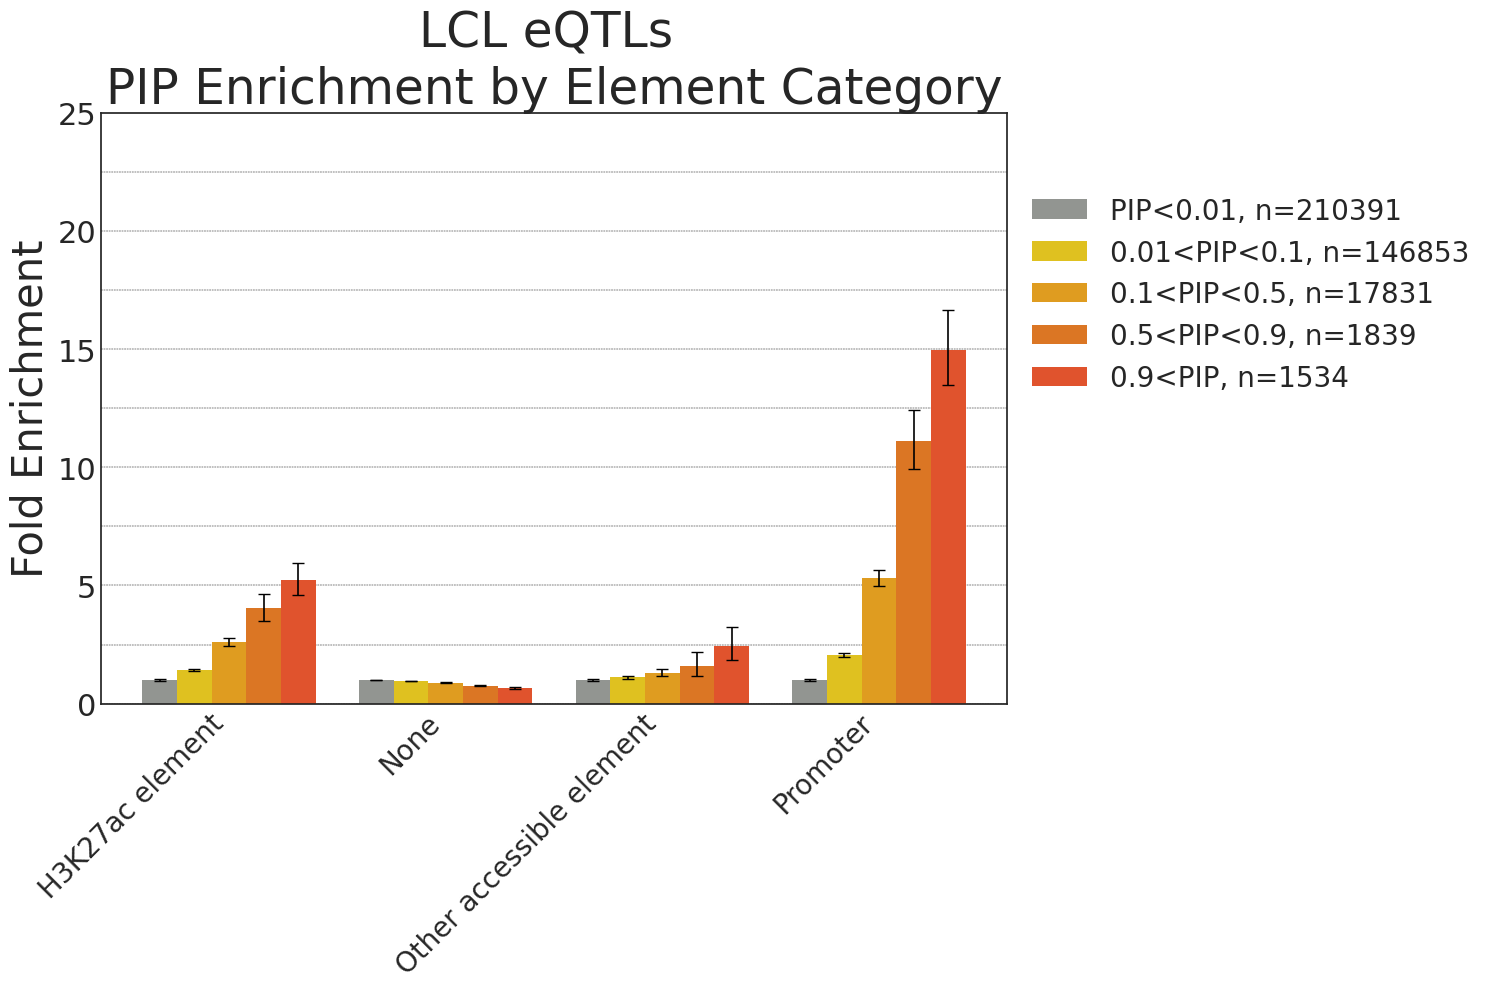

In [12]:
FE_with_err_LCL, mean_arr_LCL, legend_labels_LCL, tot_arr_lcl = make_pip_bin_logFE(LCL_eqtl_annots_cats, 
                                                                                   'data/LCL/LCL_eqtl_overlap_with_promoters_merged_cats', 
                                                                                   'LCL eQTLs \nPIP Enrichment by Element Category', ylim=25)

/tmp/ipykernel_93/3361991153.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(annotation_labels, rotation = 45, ha="right", fontsize=20);


Done.


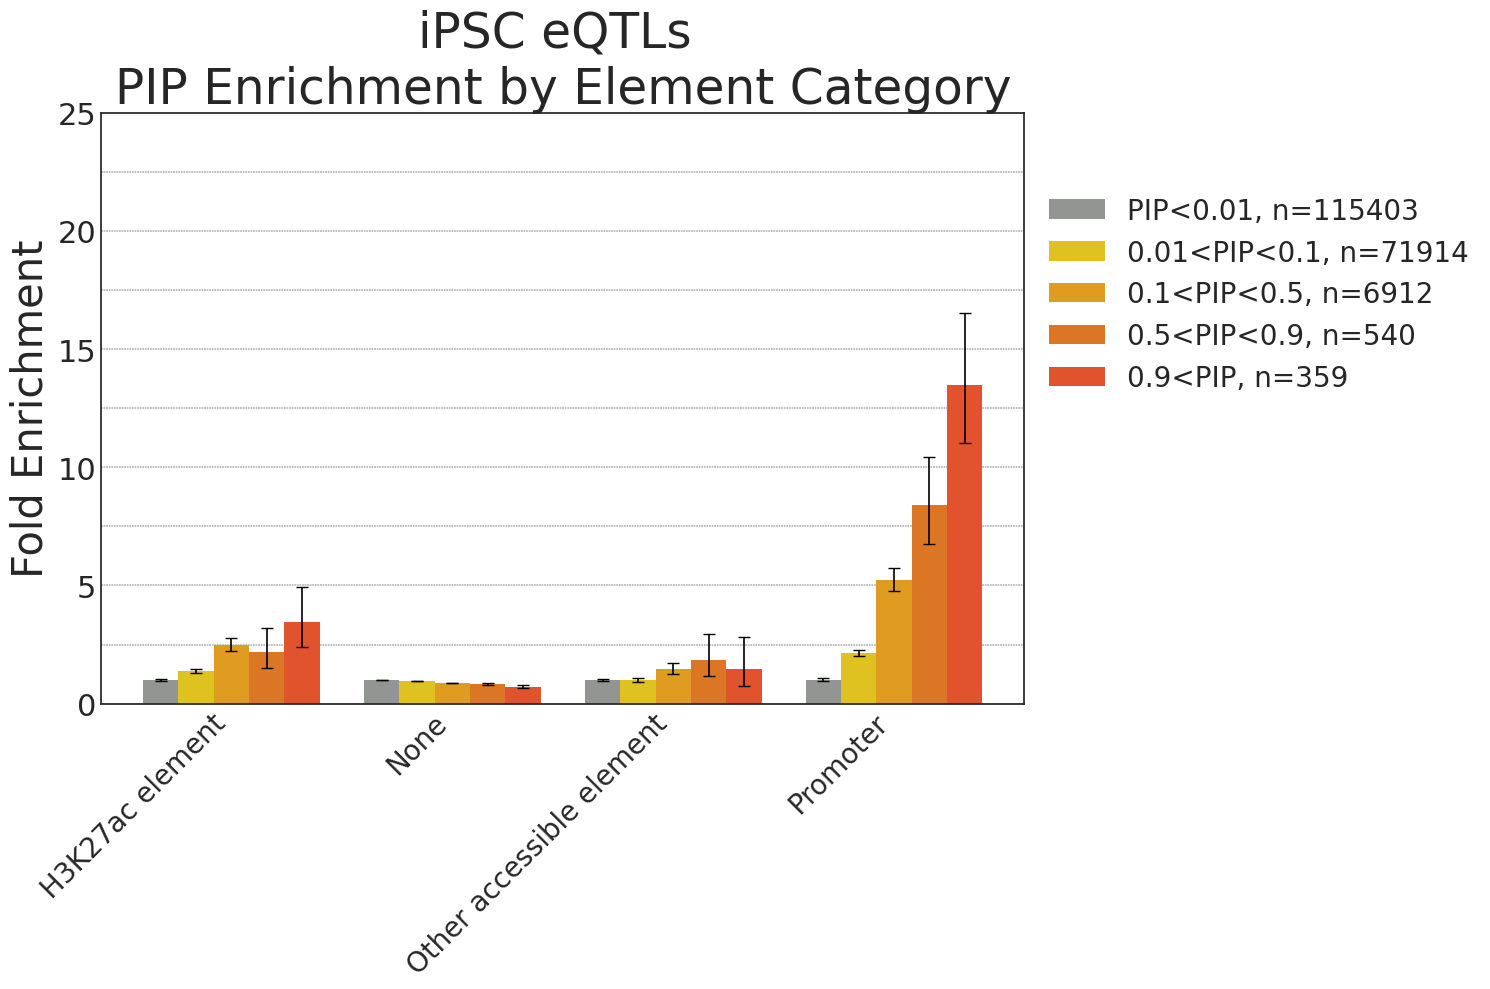

In [15]:
FE_with_err_ipsc, mean_arr_ipsc, legend_labels_ipsc, tot_arr_ipsc = make_pip_bin_logFE(iPSC_eqtl_annots_cats, 
                                                                                       'data/iPSC/iPSC_eqtl_overlap_with_promoters_merged_cats', 
                                                                                       'iPSC eQTLs \nPIP Enrichment by Element Category', ylim=25)


# Generate the stacked bar fraction plots

In [19]:
# Melt the mean arrays from above
mean_arr_LCL_melt= mean_arr_LCL.reset_index().melt(id_vars='index', var_name='PIP_bin', value_name='Fraction')
mean_arr_iPSC_melt = mean_arr_ipsc.reset_index().melt(id_vars='index', var_name='PIP_bin', value_name='Fraction')

/tmp/ipykernel_93/3774349460.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['0.01' ,'0.1', '0.5', '0.9', '1'], rotation = 0, ha="center", fontsize=20);
/tmp/ipykernel_93/3774349460.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['0.01' ,'0.1', '0.5', '0.9', '1'], rotation = 0, ha="center", fontsize=20);


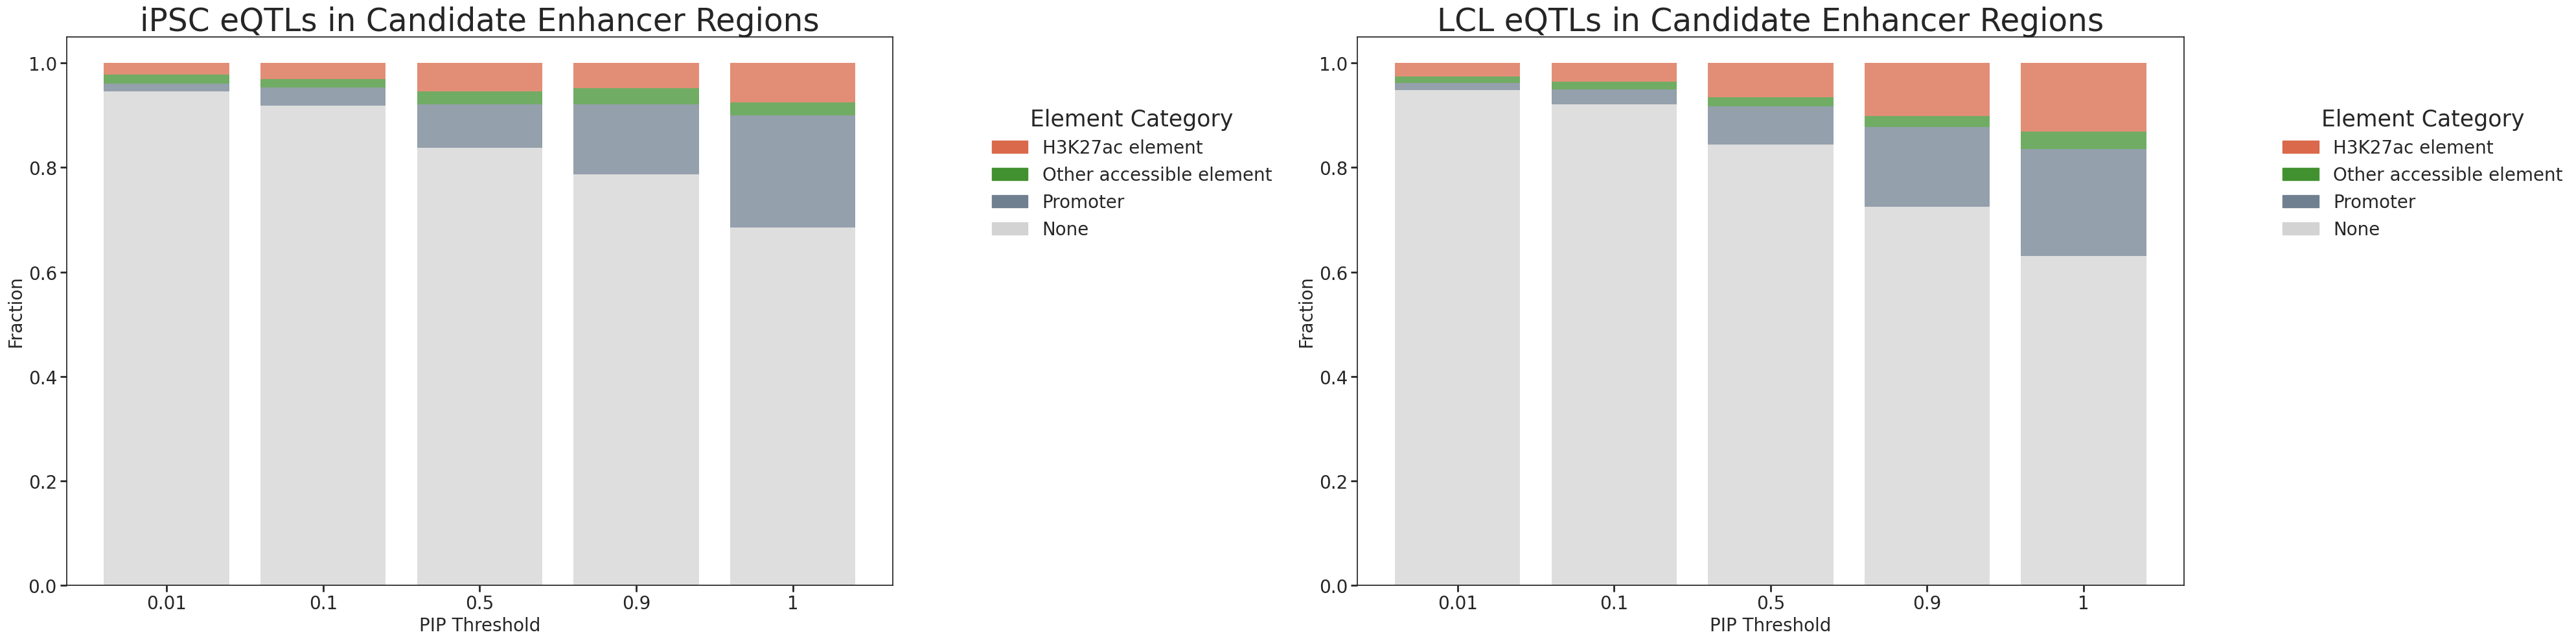

In [21]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1,2, figsize=(40,10), tight_layout=True)

colors = '#d9694a #429130 slategrey lightgrey'.split()
labels=["H3K27ac element", "Other accessible element", "promoter", 'None',]
capital_labels=["H3K27ac element", "Other accessible element", 'Promoter', 'None',]

legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, capital_labels)]

sns.set_palette(colors)
sns.histplot(
    data=mean_arr_iPSC_melt,
    x="PIP_bin", hue="index",
    multiple="stack", weights="Fraction",hue_order=labels,
    discrete=True, shrink=.8, ax=ax[0], legend=False,
    element="bars",        # ensures bars are used (default, but good to be explicit)
    edgecolor=None,        # removes black borders
    linewidth=0,
    
)
ax[0].set_xticklabels(['0.01' ,'0.1', '0.5', '0.9', '1'], rotation = 0, ha="center", fontsize=20);
ax[0].yaxis.set_tick_params(labelsize=20)

ax[0].legend(handles=legend_handles, bbox_to_anchor=(1.1, .9), fontsize=20, title='Element Category', title_fontsize=25)
ax[0].set_ylabel('Fraction', fontsize=20)
ax[0].set_xlabel('PIP Threshold', fontsize=20)
ax[0].set_title('iPSC eQTLs in Candidate Enhancer Regions', fontsize=35)

ax[0].tick_params(which='both', width=2)
ax[0].tick_params(which='major', length=7)


sns.set_palette(colors)
sns.histplot(
    data=mean_arr_LCL_melt,
    x="PIP_bin", hue="index",
    multiple="stack", weights="Fraction",hue_order=labels,
    discrete=True, shrink=.8, ax=ax[1], legend=False,
    element="bars",        # ensures bars are used (default, but good to be explicit)
    edgecolor=None,        # removes black borders
    linewidth=0,
   
)
ax[1].set_xticklabels(['0.01' ,'0.1', '0.5', '0.9', '1'], rotation = 0, ha="center", fontsize=20);
ax[1].yaxis.set_tick_params(labelsize=20)

ax[1].legend(handles=legend_handles, bbox_to_anchor=(1.1, .9), fontsize=20, title='Element Category', title_fontsize=25)
ax[1].set_ylabel('Fraction', fontsize=20)
ax[1].set_xlabel('PIP Threshold', fontsize=20)
ax[1].set_title('LCL eQTLs in Candidate Enhancer Regions', fontsize=35)

ax[1].tick_params(which='both', width=2)
ax[1].tick_params(which='major', length=7)

fig.tight_layout()
fig.savefig('data/IPSC_and_LCL_eqtl_overlap_with_promoters_combined_cats_stacked_fraction_plot.svg', dpi=300)

# Separate genes by housekeeping status and make same plots

In [23]:
genes = pd.read_table('data/gene_promoter_class_RefSeqCurated.170308.bed.CollapsedGeneBounds.hg38.TSS500bp.tsv')

In [24]:
genes['is_ubiquitous_uniform'].sum()

3058

# Same PIP plot but split by housekeeping genes and non housekeeping genes

In [25]:
# merge the annotations file with the gene labels on gene
iPSC_eqtl_annots_cats_ubq = iPSC_eqtl_annots_cats.merge(genes.rename(columns={'TargetGene':'gene_hgnc'})[['gene_hgnc', 'is_ubiquitous_uniform']], on='gene_hgnc')

/tmp/ipykernel_93/3361991153.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eqtl_annots['bins'] = pd.cut(eqtl_annots.pip, bins=bins, labels=labels, right=True, include_lowest=True)
/opt/conda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/tmp/ipykernel_93/3361991153.py:28: RuntimeWarning: divide by zero encountered in long_scalars
  SE_arr.at[annot, label] = np.sqrt( (1/a_vec[i]) + (1 / c_vec[i]) - (1 / (a_vec[i]+b_vec[i])) - (1 / (c_vec[i] + d_vec[i])))
/tmp/ipykernel_93/3361991153.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(annotation_labels, rotation = 45, ha="right", font

Done.


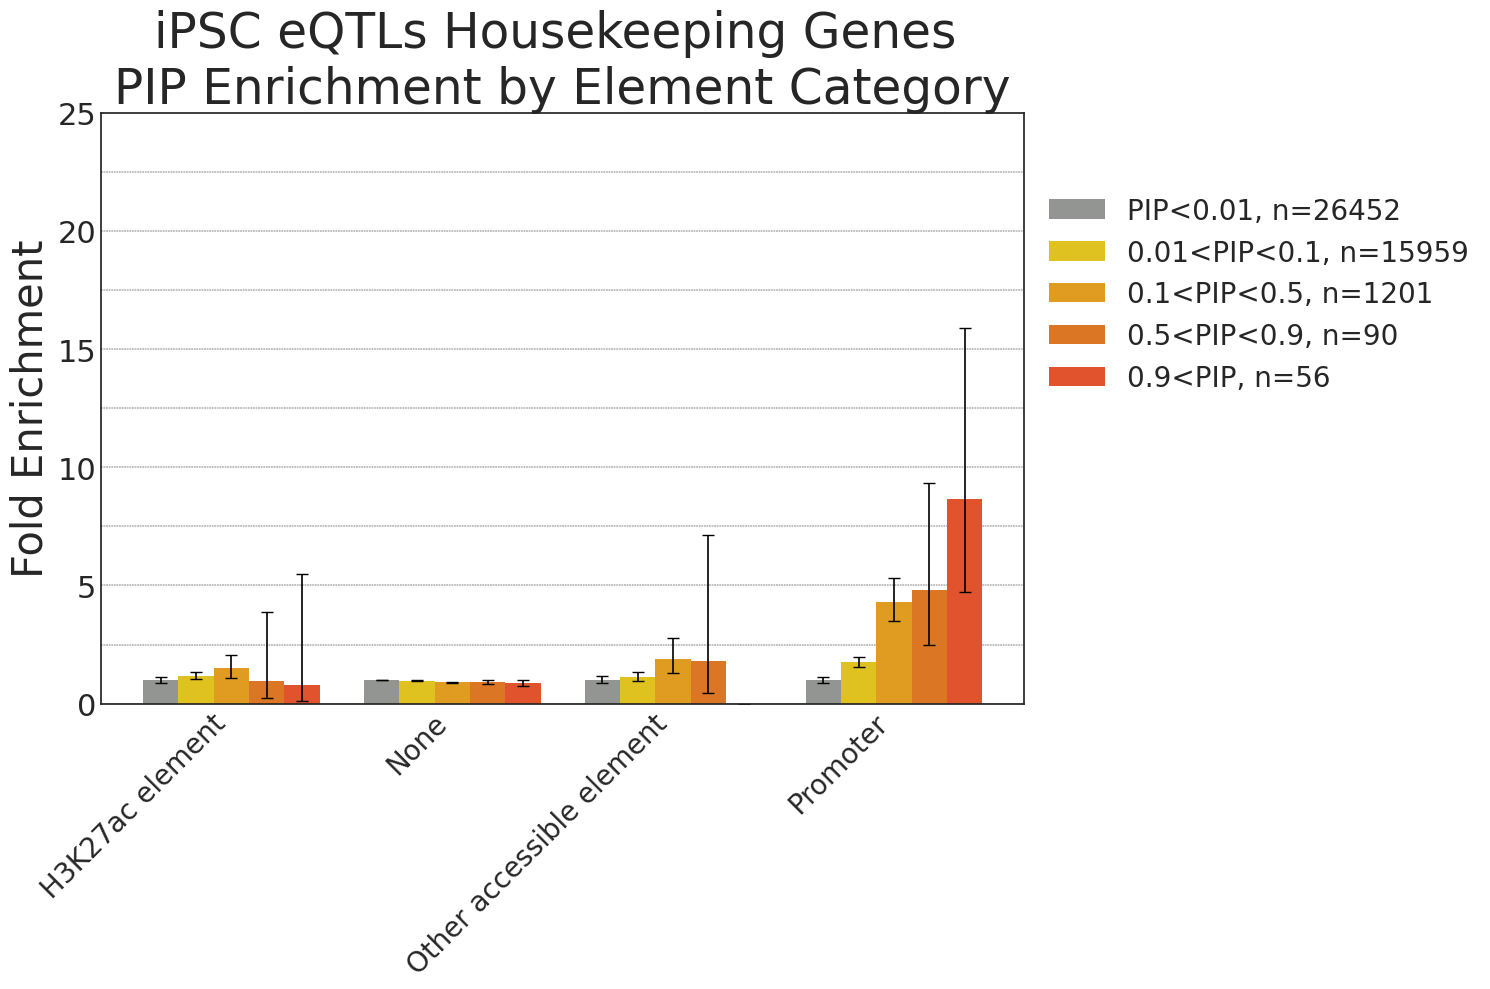

In [26]:
FE_with_err_ipsc_ubq_combined, mean_arr_ipsc_ubq_combined, legend_labels_ipsc, tot_arr_ipsc = make_pip_bin_logFE(iPSC_eqtl_annots_cats_ubq.query('is_ubiquitous_uniform'), 
                                                                                                                 'data/iPSC/iPSC_eqtl_overlap_with_promoters_merged_cats_ubq_only', 
                                                                                                                 'iPSC eQTLs Housekeeping Genes \nPIP Enrichment by Element Category', ylim=25)


/tmp/ipykernel_93/3361991153.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eqtl_annots['bins'] = pd.cut(eqtl_annots.pip, bins=bins, labels=labels, right=True, include_lowest=True)
/tmp/ipykernel_93/3361991153.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(annotation_labels, rotation = 45, ha="right", fontsize=20);


Done.


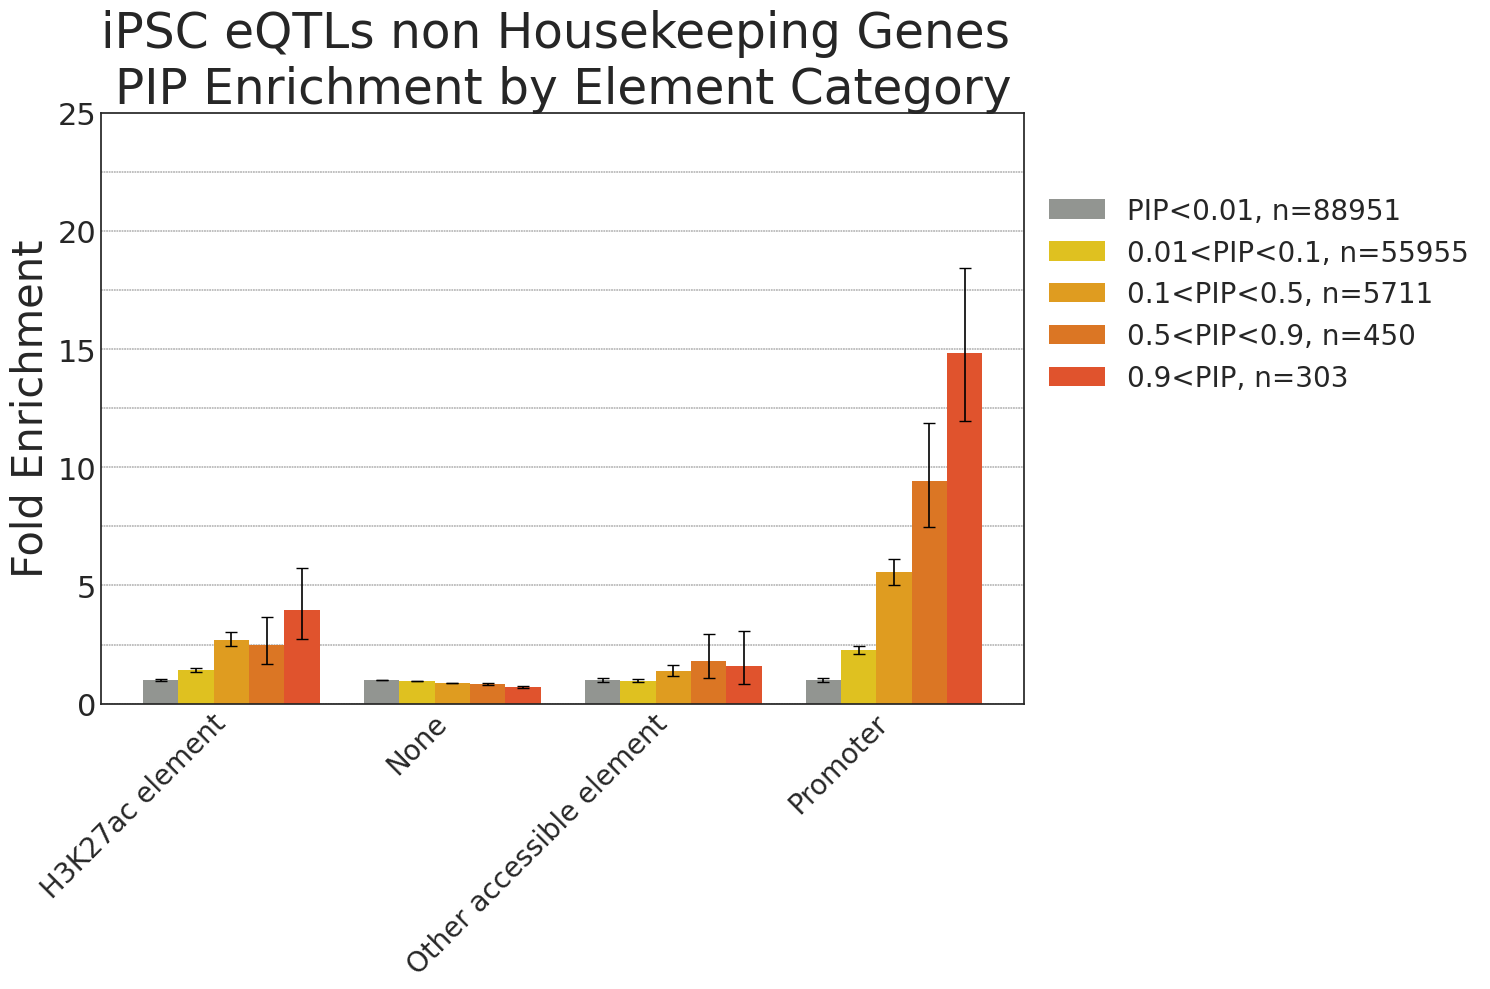

In [28]:
FE_with_err_ipsc_non_ubq_combined, mean_arr_ipsc_non_ubq_combined, legend_labels_ipsc, tot_arr_ipsc = make_pip_bin_logFE(iPSC_eqtl_annots_cats_ubq.query('~is_ubiquitous_uniform'), 
                                                                                                                         'data/iPSC/iPSC_eqtl_overlap_with_promoters_merged_cats_no_ubq_only',
                                                                                                                         'iPSC eQTLs non Housekeeping Genes \nPIP Enrichment by Element Category',
                                                                                                                         ylim=25)


# Repeat for LCLs

In [30]:
LCL_eqtl_annots_cats_ubq = LCL_eqtl_annots_cats.merge(genes.rename(columns={'TargetGene':'gene_hgnc'})[['gene_hgnc', 'is_ubiquitous_uniform']], on='gene_hgnc')

/tmp/ipykernel_93/3361991153.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eqtl_annots['bins'] = pd.cut(eqtl_annots.pip, bins=bins, labels=labels, right=True, include_lowest=True)
/tmp/ipykernel_93/3361991153.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(annotation_labels, rotation = 45, ha="right", fontsize=20);


Done.


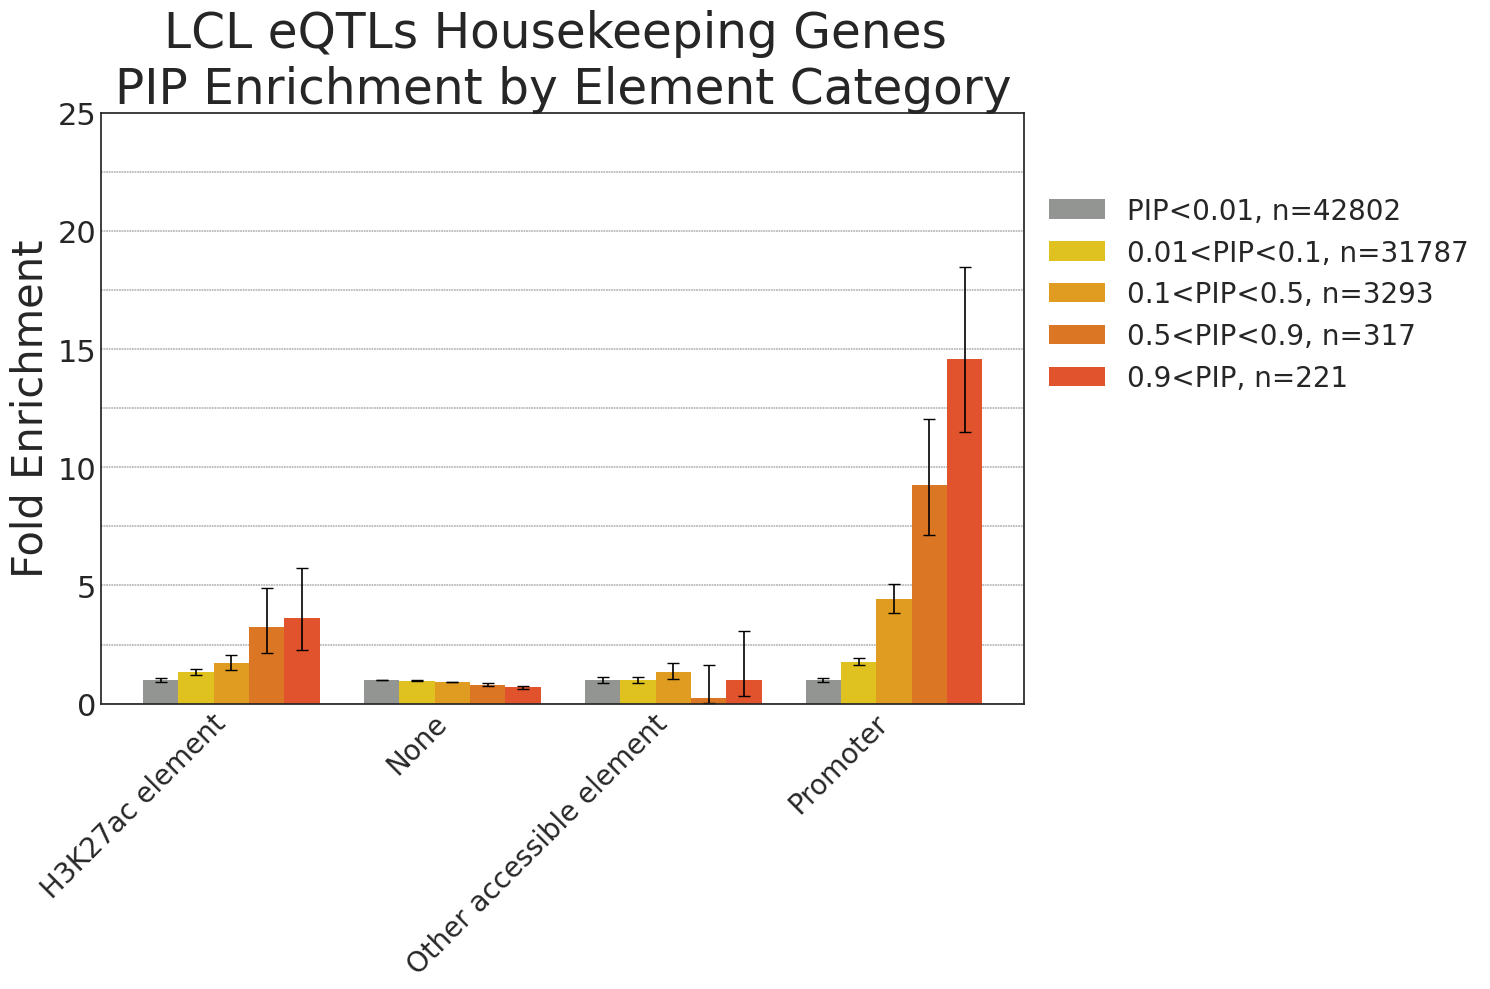

In [31]:
FE_with_err_LCL_ubq_combined, mean_arr_LCL_ubq_combined, legend_labels_LCL, tot_arr_lcl = make_pip_bin_logFE(LCL_eqtl_annots_cats_ubq.query('is_ubiquitous_uniform'), 
                                                                                                             'data/LCL/LCL_eqtl_overlap_with_promoters_merged_cats_ubq_only', 
                                                                                                             'LCL eQTLs Housekeeping Genes \nPIP Enrichment by Element Category', ylim=25)


/tmp/ipykernel_93/3361991153.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eqtl_annots['bins'] = pd.cut(eqtl_annots.pip, bins=bins, labels=labels, right=True, include_lowest=True)
/tmp/ipykernel_93/3361991153.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(annotation_labels, rotation = 45, ha="right", fontsize=20);


Done.


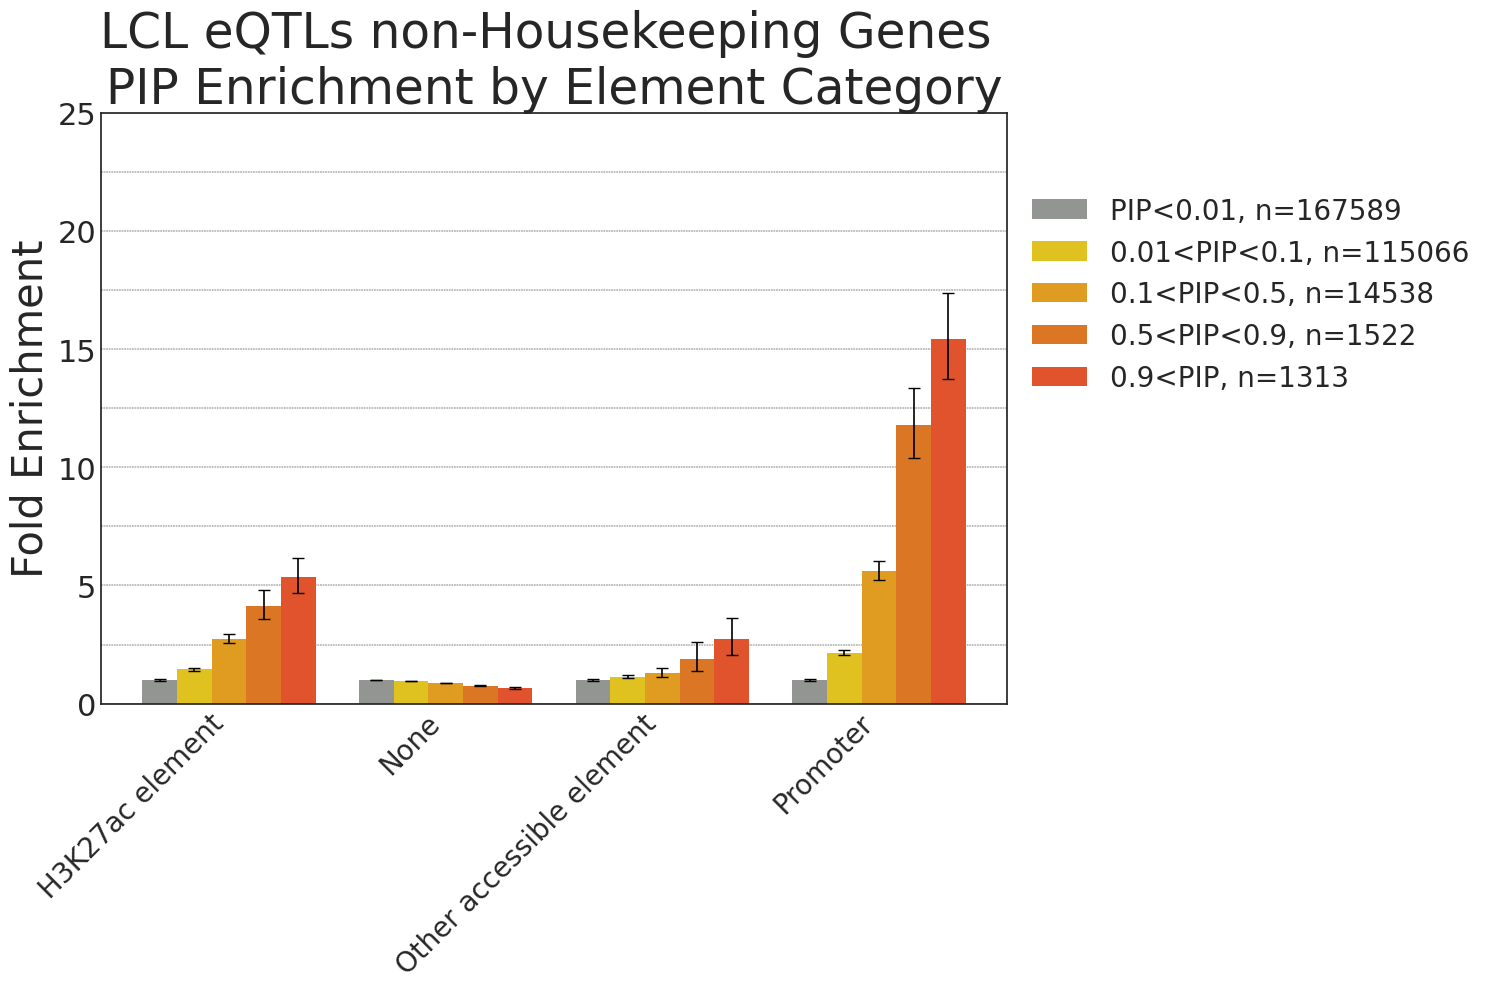

In [32]:
FE_with_err_LCL_non_ubq_combined, mean_arr_LCL_non_ubq_combined, legend_labels_LCL, tot_arr_lcl = make_pip_bin_logFE(LCL_eqtl_annots_cats_ubq.query('~is_ubiquitous_uniform'), 
                                                                                                                     'data/LCL/LCL_eqtl_overlap_with_promoters_merged_cats_non_ubq_only', 
                                                                                                                     'LCL eQTLs non-Housekeeping Genes \nPIP Enrichment by Element Category', ylim=25)


# Same fraction plot with housekeeping genes

In [34]:
# melt the mean arrays from above

mean_arr_LCL_melt_non_ubq = mean_arr_LCL_non_ubq_combined.reset_index().melt(id_vars='index', var_name='PIP_bin', value_name='Fraction')
mean_arr_LCL_melt_ubq = mean_arr_LCL_ubq_combined.reset_index().melt(id_vars='index', var_name='PIP_bin', value_name='Fraction')

mean_arr_iPSC_melt_non_ubq = mean_arr_ipsc_non_ubq_combined.reset_index().melt(id_vars='index', var_name='PIP_bin', value_name='Fraction')
mean_arr_iPSC_melt_ubq = mean_arr_ipsc_ubq_combined.reset_index().melt(id_vars='index', var_name='PIP_bin', value_name='Fraction')


/tmp/ipykernel_93/4082552416.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['0.01' ,'0.1', '0.5', '0.9', '1'], rotation = 0, ha="center", fontsize=20);
/tmp/ipykernel_93/4082552416.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['0.01' ,'0.1', '0.5', '0.9', '1'], rotation = 0, ha="center", fontsize=20);


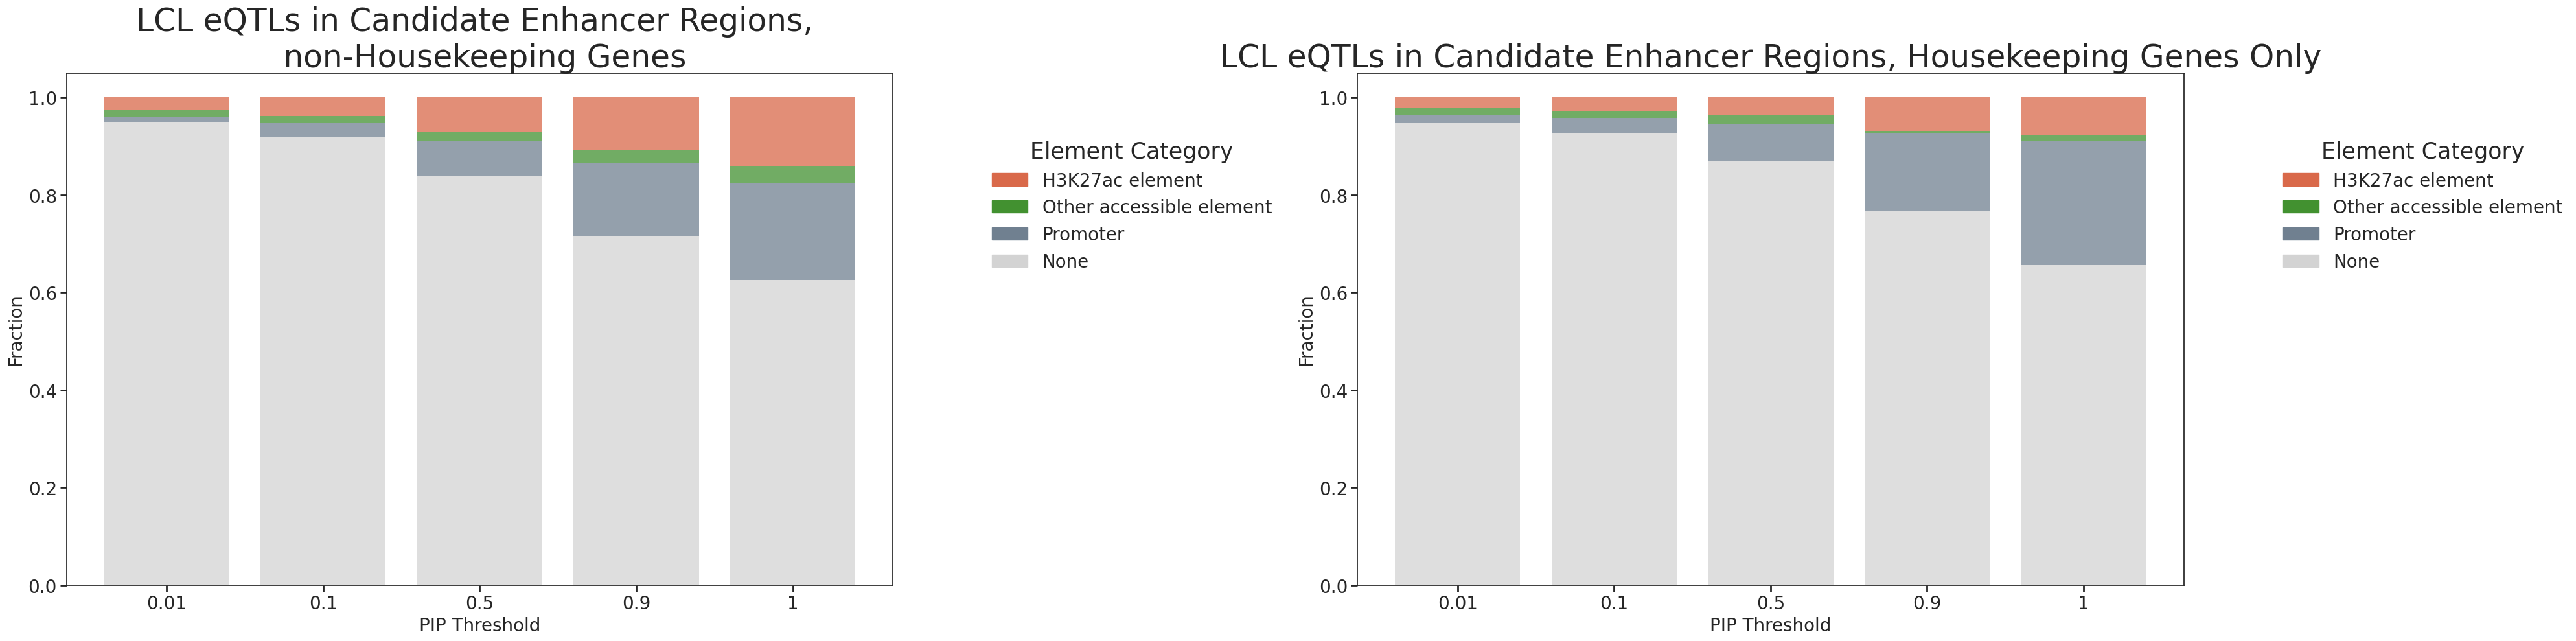

In [39]:
import matplotlib.patches as mpatches
# Safely convert 'Fraction' to numeric (coerce invalid strings to NaN)
mean_arr_LCL_melt_non_ubq['Fraction'] = pd.to_numeric(mean_arr_LCL_melt_non_ubq['Fraction'], errors='coerce')

fig, ax = plt.subplots(1,2, figsize=(40,10), tight_layout=True)

colors = '#d9694a #429130 slategrey lightgrey'.split()
labels=["H3K27ac element", "Other accessible element", "promoter", 'None',]
capital_labels=["H3K27ac element", "Other accessible element", 'Promoter', 'None',]

legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, capital_labels)]

sns.set_palette(colors)
sns.histplot(
    data=mean_arr_LCL_melt_non_ubq,
    x="PIP_bin", hue="index",
    multiple="stack", weights="Fraction",hue_order=labels,
    discrete=True, shrink=.8, ax=ax[0], legend=False,
    element="bars",        # ensures bars are used (default, but good to be explicit)
    edgecolor=None,        # removes black borders
    linewidth=0,
    
)
ax[0].set_xticklabels(['0.01' ,'0.1', '0.5', '0.9', '1'], rotation = 0, ha="center", fontsize=20);
ax[0].yaxis.set_tick_params(labelsize=20)

ax[0].legend(handles=legend_handles, bbox_to_anchor=(1.1, .9), fontsize=20, title='Element Category', title_fontsize=25)
ax[0].set_ylabel('Fraction', fontsize=20)
ax[0].set_xlabel('PIP Threshold', fontsize=20)
ax[0].set_title('LCL eQTLs in Candidate Enhancer Regions, \n non-Housekeeping Genes', fontsize=35)

ax[0].tick_params(which='both', width=2)
ax[0].tick_params(which='major', length=7)


sns.set_palette(colors)
sns.histplot(
    data=mean_arr_LCL_melt_ubq,
    x="PIP_bin", hue="index",
    multiple="stack", weights="Fraction",hue_order=labels,
    discrete=True, shrink=.8, ax=ax[1], legend=False,
    element="bars",        # ensures bars are used (default, but good to be explicit)
    edgecolor=None,        # removes black borders
    linewidth=0,
   
)
ax[1].set_xticklabels(['0.01' ,'0.1', '0.5', '0.9', '1'], rotation = 0, ha="center", fontsize=20);
ax[1].yaxis.set_tick_params(labelsize=20)

ax[1].legend(handles=legend_handles, bbox_to_anchor=(1.1, .9), fontsize=20, title='Element Category', title_fontsize=25)
ax[1].set_ylabel('Fraction', fontsize=20)
ax[1].set_xlabel('PIP Threshold', fontsize=20)
ax[1].set_title('LCL eQTLs in Candidate Enhancer Regions, Housekeeping Genes Only', fontsize=35)

ax[1].tick_params(which='both', width=2)
ax[1].tick_params(which='major', length=7)

fig.tight_layout()
fig.savefig('data/LCL/LCL_eqtl_overlap_with_promoters_combined_cats_housekeeping_stacked_fraction_plot.svg', dpi=300)

/tmp/ipykernel_93/834217669.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['0.01' ,'0.1', '0.5', '0.9', '1'], rotation = 0, ha="center", fontsize=20);
/tmp/ipykernel_93/834217669.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['0.01' ,'0.1', '0.5', '0.9', '1'], rotation = 0, ha="center", fontsize=20);


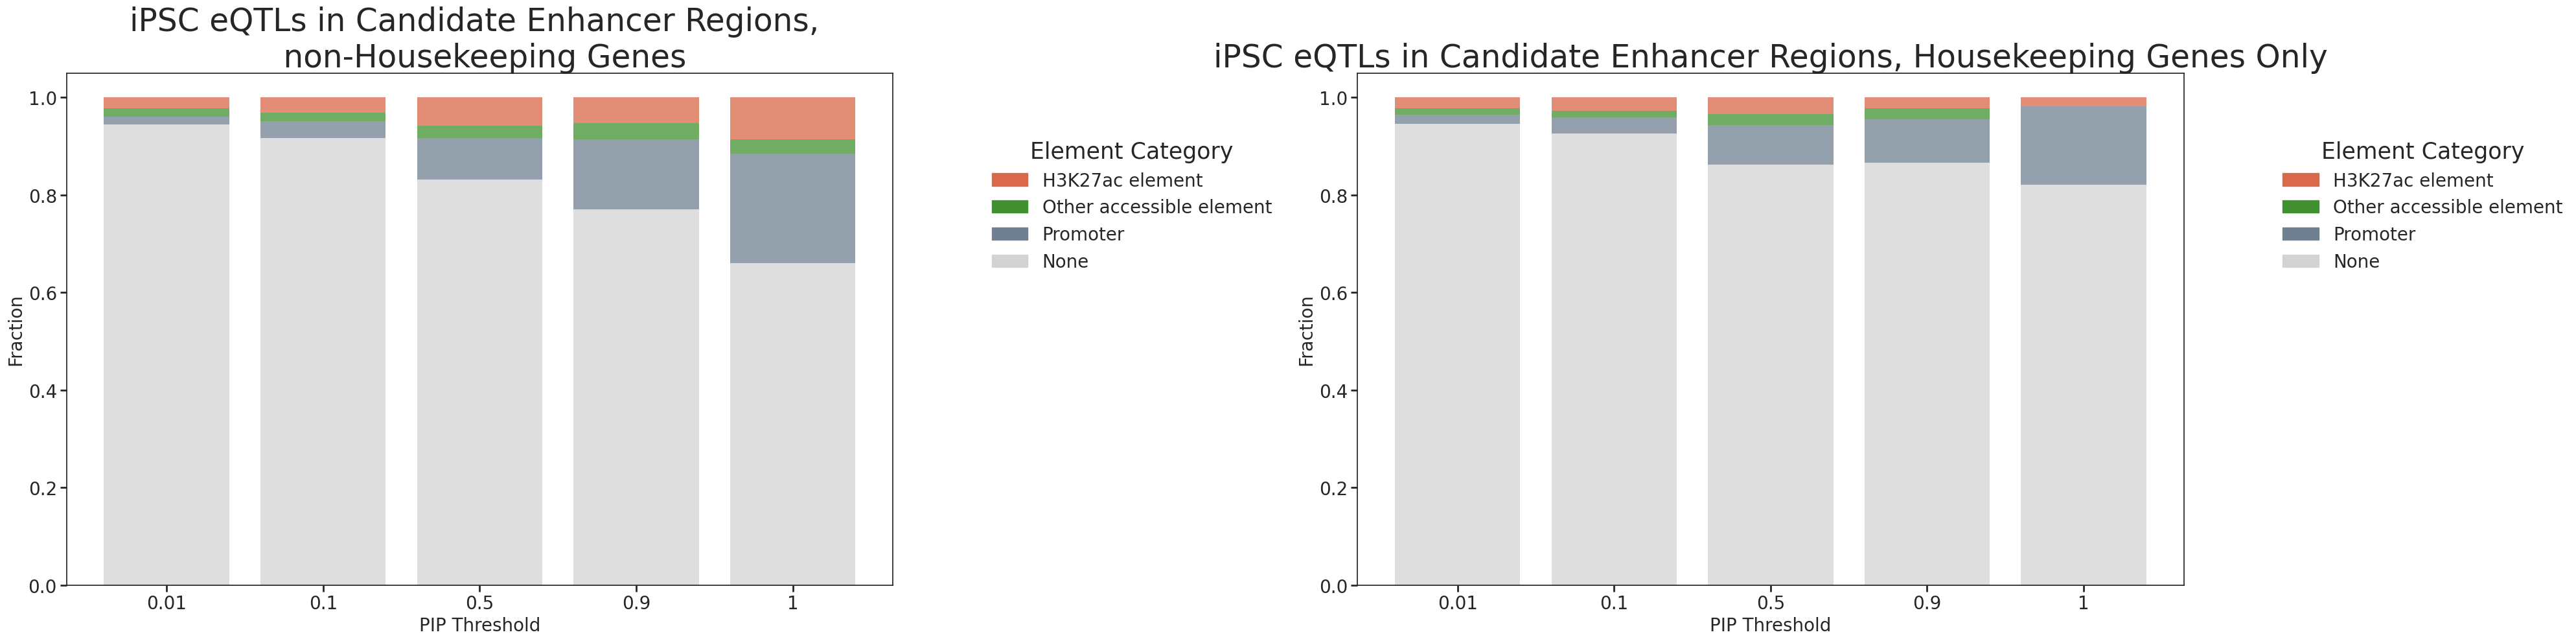

In [40]:
import matplotlib.patches as mpatches
# Safely convert 'Fraction' to numeric (coerce invalid strings to NaN)
mean_arr_iPSC_melt_non_ubq['Fraction'] = pd.to_numeric(mean_arr_iPSC_melt_non_ubq['Fraction'], errors='coerce')

fig, ax = plt.subplots(1,2, figsize=(40,10), tight_layout=True)

colors = '#d9694a #429130 slategrey lightgrey'.split()
labels=["H3K27ac element", "Other accessible element", "promoter", 'None',]
capital_labels=["H3K27ac element", "Other accessible element", 'Promoter', 'None',]

legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, capital_labels)]

sns.set_palette(colors)
sns.histplot(
    data=mean_arr_iPSC_melt_non_ubq,
    x="PIP_bin", hue="index",
    multiple="stack", weights="Fraction",hue_order=labels,
    discrete=True, shrink=.8, ax=ax[0], legend=False,
    element="bars",        # ensures bars are used (default, but good to be explicit)
    edgecolor=None,        # removes black borders
    linewidth=0,
    
)
ax[0].set_xticklabels(['0.01' ,'0.1', '0.5', '0.9', '1'], rotation = 0, ha="center", fontsize=20);
ax[0].yaxis.set_tick_params(labelsize=20)

ax[0].legend(handles=legend_handles, bbox_to_anchor=(1.1, .9), fontsize=20, title='Element Category', title_fontsize=25)
ax[0].set_ylabel('Fraction', fontsize=20)
ax[0].set_xlabel('PIP Threshold', fontsize=20)
ax[0].set_title('iPSC eQTLs in Candidate Enhancer Regions, \n non-Housekeeping Genes', fontsize=35)

ax[0].tick_params(which='both', width=2)
ax[0].tick_params(which='major', length=7)


sns.set_palette(colors)
sns.histplot(
    data=mean_arr_iPSC_melt_ubq,
    x="PIP_bin", hue="index",
    multiple="stack", weights="Fraction",hue_order=labels,
    discrete=True, shrink=.8, ax=ax[1], legend=False,
    element="bars",        # ensures bars are used (default, but good to be explicit)
    edgecolor=None,        # removes black borders
    linewidth=0,
   
)
ax[1].set_xticklabels(['0.01' ,'0.1', '0.5', '0.9', '1'], rotation = 0, ha="center", fontsize=20);
ax[1].yaxis.set_tick_params(labelsize=20)

ax[1].legend(handles=legend_handles, bbox_to_anchor=(1.1, .9), fontsize=20, title='Element Category', title_fontsize=25)
ax[1].set_ylabel('Fraction', fontsize=20)
ax[1].set_xlabel('PIP Threshold', fontsize=20)
ax[1].set_title('iPSC eQTLs in Candidate Enhancer Regions, Housekeeping Genes Only', fontsize=35)

ax[1].tick_params(which='both', width=2)
ax[1].tick_params(which='major', length=7)

fig.tight_layout()
fig.savefig('data/iPSC_eqtl_overlap_with_promoters_combined_cats_housekeeping_stacked_fraction_plot.svg', dpi=300)